In [20]:
import statistics
from utils import catalan_number
from utils import is_retroceding, random_walk
from markov import *
from collections import Counter

In [77]:
n = 1000
c = 3
g = ig.Graph.Erdos_Renyi(n, c / n)
t = 2
start_node = 0


def p_t_fr_and_retro_simulation(samples):
    retro_walks = 0
    retro_walks_counter = Counter()
    for _ in tqdm(range(samples)):
        walk = random_walk(g, start_node=0, length=t)
        retro_walks_counter.update({str(walk): 1})
        if is_retroceding(walk):
            retro_walks += 1

    retro_probability = retro_walks / samples
    print(f"probability: {retro_probability}, count: {retro_walks}")
    print(retro_walks_counter)


def get_simulation_histogram():
    walks = [[start_node]]
    for _ in range(t):
        new_walks = []
        for walk in walks:
            v = walk[-1]
            for u in g.neighbors(v):
                new_walks.append(walk + [u])
        walks = new_walks

    all_walks = len(walks)
    retro_walks = len([w for w in walks if is_retroceding(w)])
    print(f"probability: {retro_walks/all_walks}, count: {retro_walks}, all: {all_walks}")


p_t_fr_and_retro_simulation(100000)
get_simulation_histogram()

100%|██████████| 100000/100000 [00:00<00:00, 118336.51it/s]

probability: 0.31419, count: 31419
Counter({'[0, 790, 688]': 25071, '[0, 790, 0]': 25048, '[0, 732, 753]': 6388, '[0, 732, 0]': 6371, '[0, 732, 63]': 6300, '[0, 732, 623]': 6239, '[0, 732, 726]': 6178, '[0, 732, 457]': 6173, '[0, 732, 43]': 6125, '[0, 732, 53]': 6107})
probability: 0.2, count: 2, all: 10


In [75]:
g.neighbors(0)

[282, 826]

In [ ]:


#get_simulation_histogram(10,2,2,samples=1)

In [26]:
def get_simulation_histogram(n, c, depth, samples=100, summary=False):
    n_walks = []
    n_retro_walks = []
    probs = []
    for i in tqdm(range(samples)):
        g = ig.Graph.Erdos_Renyi(n, c / n)
        walks = [[0]]
        for _ in range(depth):
            new_walks = []
            for walk in walks:
                v = walk[-1]
                for u in g.neighbors(v):
                    new_walks.append(walk + [u])
            walks = new_walks
        #print(walks)
        if len(walks) == 0:
            continue
        n_walks.append(len(walks))
        n_retro_walks.append(len([w for w in walks if is_retroceding(w)]))
        probs.append(len([w for w in walks if is_retroceding(w)]) / len(walks))
        #(w.count(0) == 2 and w == w[::-1])])
    #print(n_walks[:30])
    if not summary:
        return n_walks, n_retro_walks, probs
    else:
        return statistics.mean(n_walks), statistics.mean(n_retro_walks), statistics.mean(probs)

#get_simulation_histogram(10,2,2,samples=1)

In [24]:
is_retroceding([])

False

100%|██████████| 10000/10000 [00:06<00:00, 1537.24it/s]


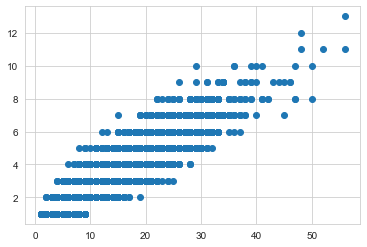

In [27]:
n = 1000
c = 3
x = 2

simulation = get_simulation_histogram(n, c, x, samples=10000, summary=False)
n_walks = simulation[0]
n_retro_walks = simulation[1]
probs = simulation[2]

plt.scatter(n_walks, n_retro_walks)

In [28]:
n = 1000
c = 3
x = [2]

simulations = [get_simulation_histogram(n, c, depth, samples=10000, summary=True) for depth in x]
n_walks = [x[0] for x in simulations]
n_retro_walks = [x[1] for x in simulations]
probs = [x[2] for x in simulations]

100%|██████████| 10000/10000 [00:06<00:00, 1557.56it/s]


In [31]:
n_walks_thoery = [(c * ((c + 1 - c / n) ** (t - 1))) for t in x]
n_retro_walks_theory = [(catalan_number(int(t / 2 - 1)) * c * (c - c / n) * ((c - 2 * c / n) ** (t / 2 - 2))) for t in
                        x]

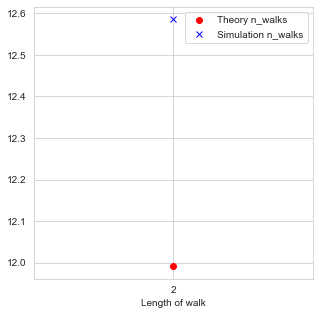

In [32]:
plt.figure(figsize=(5, 5))
plt.plot(x, n_walks_thoery, "or", label="Theory n_walks")
plt.plot(x, n_walks, "xb", label="Simulation n_walks")
plt.xticks(x)
plt.xlabel("Length of walk")
plt.legend()

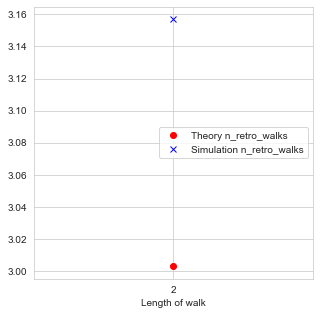

In [33]:
plt.figure(figsize=(5, 5))
plt.plot(x, n_retro_walks_theory, "ro", label="Theory n_retro_walks")
plt.plot(x, n_retro_walks, "xb", label="Simulation n_retro_walks")
plt.xticks(x)
plt.xlabel("Length of walk")
plt.legend()

In [34]:
n_retro_walks_theory[0] / n_walks_thoery[0]

0.25043832974931596

In [35]:
n_retro_walks[0] / n_walks[0]

0.2508357849692431

In [36]:
probs

[0.27495080740807076]

In [177]:
n = 1000
c = 3
samples = 100000
# s = np.random.binomial(n-1, c/n, samples) + 1
p = np.random.poisson(c, samples) + 1
print(f'binomial - mean: {np.mean(p)}, reciprocal mean: {np.mean(1/p)}')
print(f'poisson -  mean: {np.mean(p)}, reciprocal mean: {np.mean(1-1/p)}')
1-1/p

binomial - mean: 3.9933, reciprocal mean: 0.31753603144078146
poisson -  mean: 3.9933, reciprocal mean: 0.6824639685592186


array([0.8       , 0.75      , 0.85714286, ..., 0.9       , 0.75      ,
       0.8       ])